In [4]:
import pandas as pd
import seaborn as sns
import pingouin as pg
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## One-sample t-test

In [50]:

df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/zeppo.csv")
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


In [51]:
grades = df['grades']
popmean = 67.5
pg.ttest(grades, popmean).round(2)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.25,19,two-sided,0.04,"[67.84, 76.76]",0.5,1.795,0.57


## How to report statistics

$t(19) = 2.25$, $p<.05$, CI$_{95} = [67.8, 76.8]

In [5]:


df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/harpo.csv')
df.head()

,grade,tutor
0,65,Anastasia
1,72,Bernadette
2,66,Bernadette
3,74,Anastasia
4,73,Anastasia


In [6]:
harpo_summary = pd.DataFrame(
    {'students': ['Anastasia\'s students','Bernadette\'s students'],
     'mean': [df.loc[df['tutor'] == 'Anastasia']['grade'].mean().round(2), 
             df.loc[df['tutor'] == 'Bernadette']['grade'].mean().round(2)],
     'std dev': [df.loc[df['tutor'] == 'Anastasia']['grade'].std(), 
                df.loc[df['tutor'] == 'Bernadette']['grade'].std()],
     'N': [len(df.loc[df['tutor'] == 'Anastasia']),
           len(df.loc[df['tutor'] == 'Bernadette'])]
    })
harpo_summary

,students,mean,std dev,N
0,Anastasia's students,74.53,8.998942,15
1,Bernadette's students,69.06,5.774918,18


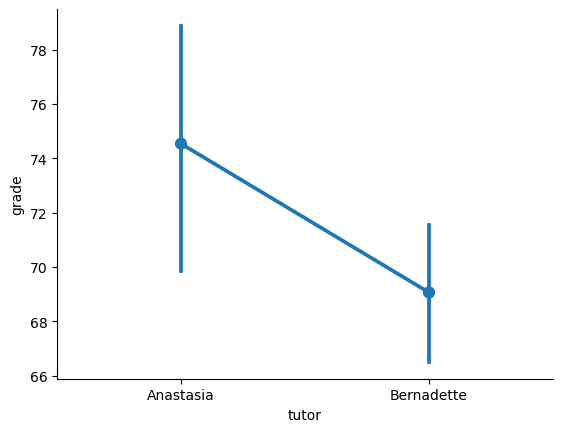

In [7]:

sns.pointplot(x = 'tutor', y = 'grade', data = df)
sns.despine()


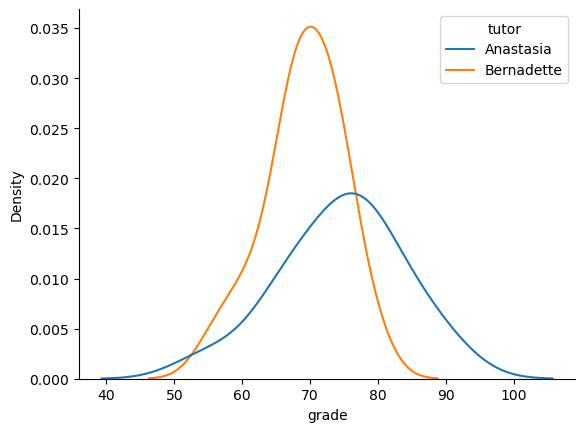

In [8]:
sns.kdeplot(data = df, x = 'grade', hue = 'tutor')
sns.despine()

In [9]:
#Welch independent samples t-test (no assumption of equal variance)

#For Student t-test and more on pooled variance see the section of LSP on independent samples t-tests.

pg.ttest(df[df['tutor'] == 'Anastasia']['grade'], df[df['tutor'] == 'Bernadette']['grade'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.034187,23.024806,two-sided,0.05361,"[-0.09, 11.05]",0.739561,1.556,0.53577


In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/Experiments/Experiment1/data/data.csv')
data = df[df['correct'] == True]
data.head()

,Unnamed: 0,ID,sender,sender_type,sender_id,ended_on,duration,time_run,time_render,time_show,...,response,response_action,prime,target,condition,soa_condition,congruence,correct_response,correctResponse,correct
0,40,2215,target,canvas.Screen,12_0_0_0_4,response,865.791,11908.1,11904.343,11921.009,...,response_manmade,m,paint,PAINT,Con_Synth,short,congruent,m,m,True
1,46,2215,target,canvas.Screen,12_0_0_1_4,response,642.551,13406.2,13404.283,13420.949,...,response_natural,n,berry,OTTER,Inc_Nat_Nat,short,incongruent,n,n,True
3,58,2215,target,canvas.Screen,12_0_0_3_4,response,710.994,16150.6,16150.000,16171.106,...,response_natural,n,fern,PETAL,Inc_Nat_Nat,short,incongruent,n,n,True
4,64,2215,target,canvas.Screen,12_0_0_4_4,response,598.582,17522.4,17521.052,17537.718,...,response_natural,n,tiger,TIGER,Con_Nat,short,congruent,n,n,True
6,76,2215,target,canvas.Screen,12_0_0_6_4,response,614.026,20292.0,20287.608,20304.274,...,response_natural,n,frog,FROG,Con_Nat,short,congruent,n,n,True


<Axes: xlabel='soa_condition', ylabel='duration'>

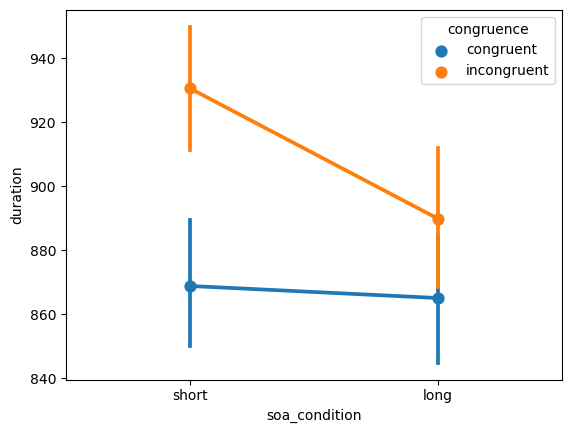

In [11]:
sns.pointplot(data = data, x='soa_condition', y='duration', hue='congruence')

In [12]:
df_short = data[data['soa_condition'] == 'short']

<Axes: xlabel='congruence', ylabel='duration'>

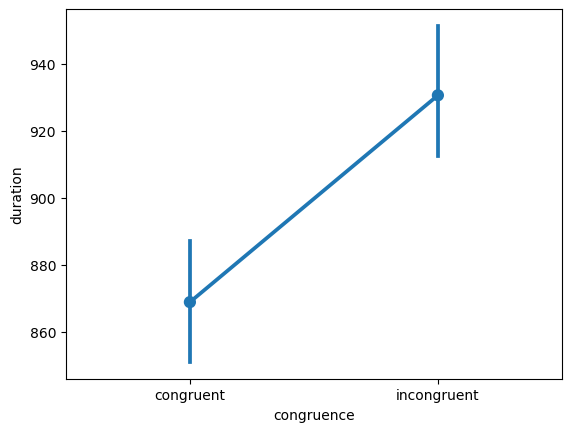

In [13]:
sns.pointplot(data=df_short, x='congruence', y='duration')

<Axes: xlabel='duration', ylabel='Density'>

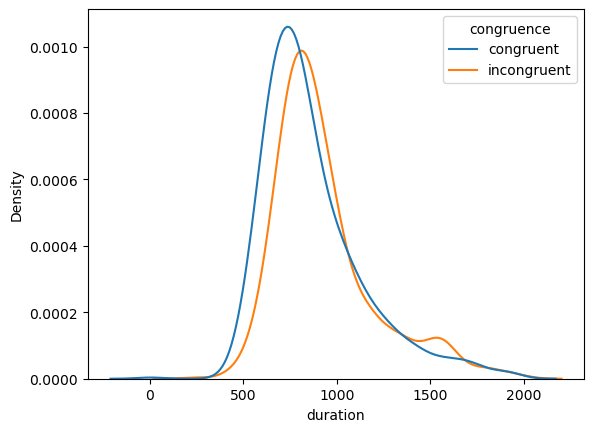

In [14]:
sns.kdeplot(data=df_short, x='duration', hue='congruence')

<Axes: xlabel='duration', ylabel='Density'>

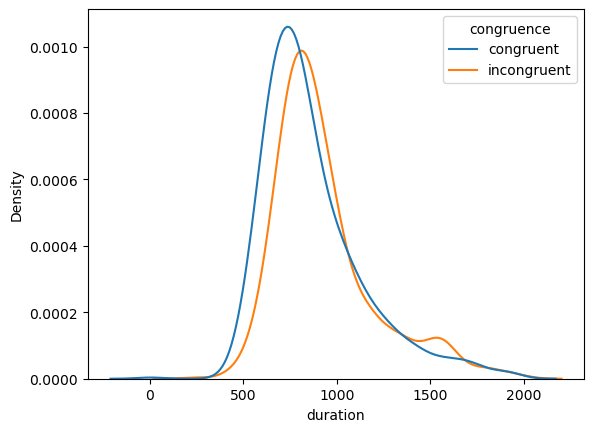

In [15]:
sns.kdeplot(data=df_short, x='duration', hue='congruence')

#plt.axvline(x=df_short[df_short['congruence'] == 'congruent']['duration'].mean())
#plt.axvline(x=df_short[df_short['congruence'] == 'incongruent']['duration'].mean(), color = 'tab:orange')


#plt.axvline(x=df_short[df_short['congruence'] == 'congruent']['duration'].mean() - df_short[df_short['congruence'] == 'congruent']['duration'].std(), ls = 'dotted')
#plt.axvline(x=df_short[df_short['congruence'] == 'congruent']['duration'].mean() + df_short[df_short['congruence'] == 'congruent']['duration'].std(), ls = 'dotted')

#plt.axvline(x=df_short[df_short['congruence'] == 'incongruent']['duration'].mean() - df_short[df_short['congruence'] == 'incongruent']['duration'].std(), ls = 'dotted', color = 'tab:orange')
#plt.axvline(x=df_short[df_short['congruence'] == 'incongruent']['duration'].mean() + df_short[df_short['congruence'] == 'incongruent']['duration'].std(), ls = 'dotted', color = 'tab:orange')


In [37]:
data_agg = df_short.groupby(['ID', 'congruence']).mean().reset_index()

In [39]:
data_agg

,ID,congruence,Unnamed: 0,duration,time_run,time_render,time_show,time_end,time_commit,time_switch,correct
0,2181,congruent,212.137931,720.193517,123924.041379,123920.550069,123935.734069,124655.927586,124659.606897,124669.038069,1.0
1,2181,incongruent,209.555556,762.818889,123284.240741,123281.226222,123295.788519,124058.607407,124062.366667,124071.066148,1.0
2,2182,congruent,232.206897,874.749034,122150.282759,122148.273655,122156.237172,123030.986207,123032.434483,123040.240241,1.0
3,2182,incongruent,207.777778,969.095741,115632.507407,115630.465370,115640.841296,116609.937037,116611.407407,116620.001741,1.0
4,2183,congruent,638.000000,697.762433,233040.286667,233039.000667,233055.547567,233753.310000,233754.416667,233766.829633,1.0
...,...,...,...,...,...,...,...,...,...,...,...
59,2213,incongruent,635.909091,1255.149409,401968.422727,401966.898364,401983.468773,403238.618182,403239.936364,403249.674545,1.0
60,2214,congruent,671.666667,758.511259,160930.229630,160927.956074,160944.622074,161703.133333,161706.544444,161714.344370,1.0
61,2214,incongruent,611.560000,708.244080,146306.588000,146303.877920,146320.543920,147028.788000,147032.276000,147040.515120,1.0
62,2215,congruent,244.000000,787.069583,59278.541667,59276.845458,59292.638750,60079.708333,60086.870833,60099.550917,1.0


<Axes: xlabel='congruence', ylabel='duration'>

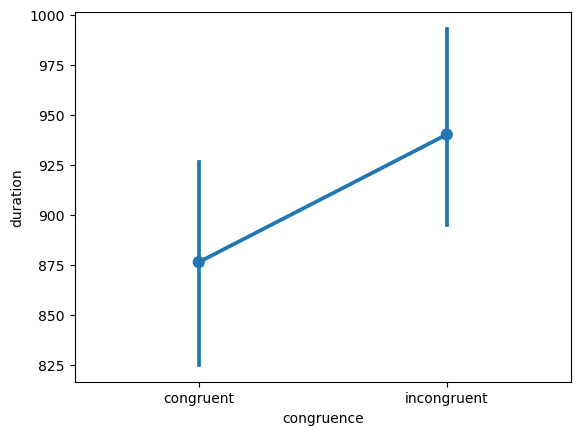

In [48]:
sns.pointplot(data=data_agg, x='congruence', y='duration')

In [41]:
congruent = data_agg[data_agg['congruence'] == 'congruent']['duration']
incongruent = data_agg[data_agg['congruence'] == 'incongruent']['duration']

In [46]:
pg.ttest(congruent, incongruent, paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.869927,31,two-sided,0.000524,"[-97.36, -30.16]",0.440818,57.828,0.675761


In [49]:
stats.ttest_rel(congruent, incongruent)

TtestResult(statistic=-3.8699273869331297, pvalue=0.0005236987641813153, df=31)